<a href="https://colab.research.google.com/github/jash0803/crop_time_series_forcasting/blob/main/Hackout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 473, in run
    env = get_environment(lib_locations)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/metadata/__init__.py", line 86, in get_environment
    return select_backend().Environment.from_paths(paths)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/metadata/pkg_resources.py", line 263, in from_paths
    return cls(pkg_resources.WorkingSet(paths))
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line

In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_excel('/content/Final DataSet.xlsx',index_col='Date',parse_dates=True)
print('Shape of data',df.shape)
df

Shape of data (127, 16)


,Bihar,Delhi,Gujarat,Haryana,Himachal Pradesh,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Odisha,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,West Bengal,All India Average
Date,,,,,,,,,,,,,,,,
2014-01-01,2627.42,2310.00,1968.29,2043.75,2796.55,2775.00,3191.94,2171.74,2400.00,2129.59,2648.96,2643.55,2617.36,2053.75,2366.32,2451.32
2014-02-01,2591.43,2275.00,1975.00,2038.13,2847.48,2783.93,3155.56,2243.44,2432.60,2116.25,2653.33,3080.00,2637.80,2018.62,2452.94,2478.15
2014-03-01,2662.50,2265.00,1930.00,2050.50,2891.23,2769.57,3193.33,2248.61,2415.58,2130.39,2630.00,2790.38,2629.29,2029.38,2490.00,2489.92
2014-04-01,2765.38,2319.44,1946.88,2160.56,2885.97,2780.95,3220.51,2200.89,2430.96,2137.50,2732.43,2758.33,2609.39,2031.75,2412.50,2487.96
2014-05-01,2892.65,2311.90,2058.75,2173.17,2880.00,2767.86,3226.67,2270.29,2411.21,2160.71,2705.66,2842.18,2633.96,2033.39,2403.24,2498.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,3340.34,2800.00,3406.61,3213.94,3574.22,5333.91,4472.52,3379.13,4391.00,3444.40,3376.75,3237.05,5749.83,3374.73,3927.78,3910.01
2024-04-01,3341.49,2800.00,3355.77,3197.17,3576.61,5369.57,4499.47,3423.24,4434.59,3469.79,3430.84,3241.09,5716.10,3345.19,3928.87,3905.43
2024-05-01,3363.97,2774.19,3390.33,3195.33,3602.67,5348.06,4519.62,3456.90,4416.72,3440.35,3422.00,3247.33,5728.46,3347.53,3940.12,3908.75


<Axes: xlabel='Date'>

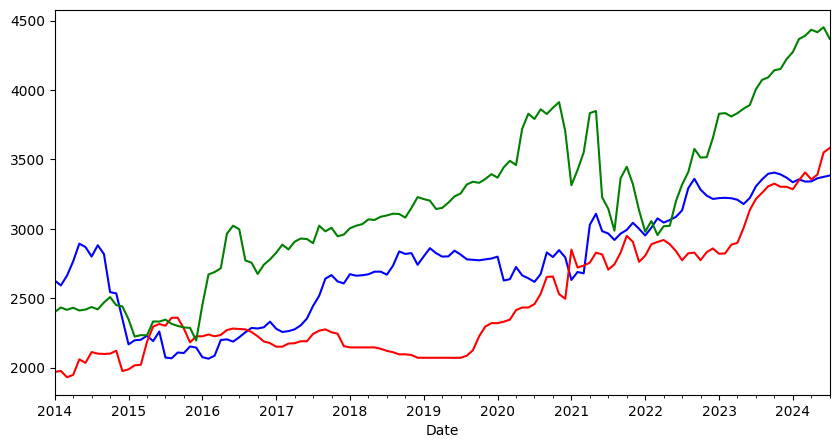

In [8]:
df['Bihar'].plot(figsize=(10, 5), color='blue')
df['Gujarat'].plot(figsize=(10,5), color='red')
df['Maharashtra'].plot(figsize=(10,5), color='green')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['Bihar'])

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [20]:
adfuller_test(df['Bihar'])

ADF Test Statistic : -0.4593270834633115
p-value : 0.8997121594393853
#Lags Used : 5
Number of Observations Used : 121
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


ADF Test Statistic : -4.813499476398576
p-value : 5.124266032930897e-05
#Lags Used : 4
Number of Observations Used : 121
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


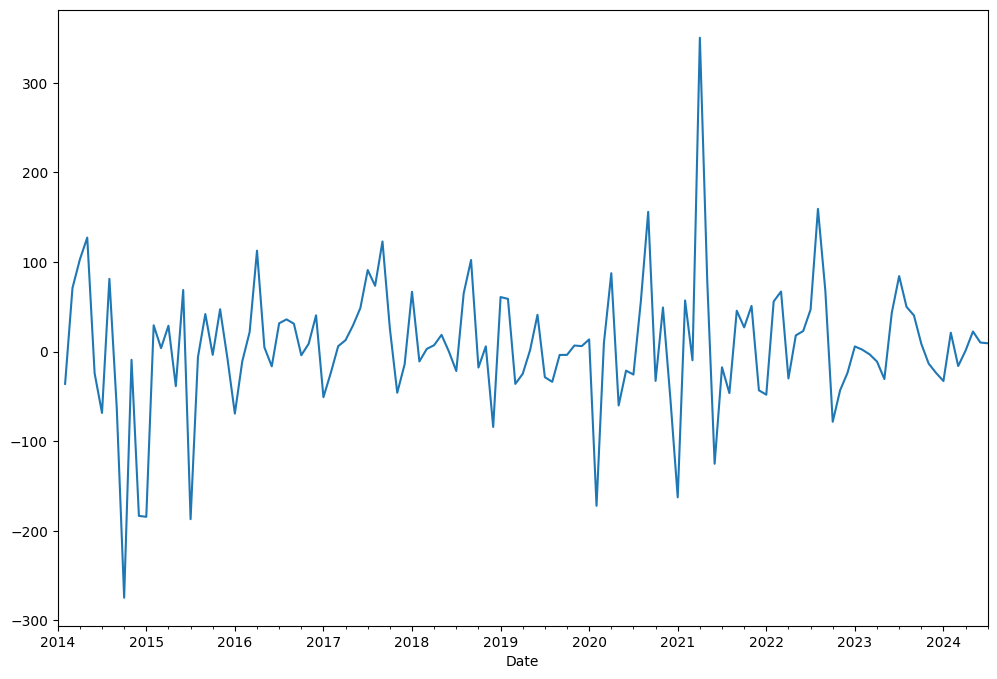

In [21]:
# prompt: convert above non-stationary data to stationary data

df['Bihar Price First Difference'] = df['Bihar'] - df['Bihar'].shift(1)
df['Bihar Price First Difference'].plot(figsize=(12,8))
adfuller_test(df['Bihar Price First Difference'].dropna())

In [14]:
!pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [22]:
model=sm.tsa.statespace.SARIMAX(df['Bihar'],order=(0, 1, 0),seasonal_order=(0,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
predict_df=pd.read_excel('/content/Prediction.xlsx',index_col='Date',parse_dates=True)


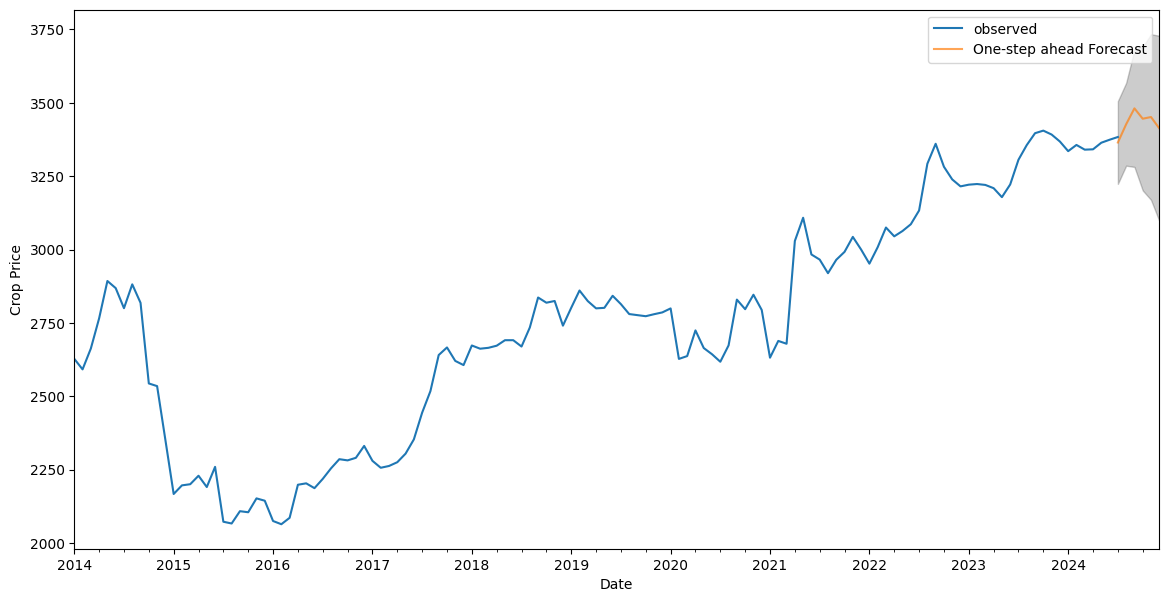

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2024-07-01'), end=pd.to_datetime('2024-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['Bihar'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()
plt.show()
